<h1 align="center">Machine Learning</h1><h2 align="center" style="margin:10px">Assignment 4</h2>

In [ ]:
# Student names and numbers:
# Faizan Yousaf (260101)
# Afonso Taborda (254017)
# Liviu Pascari (266094)
# Dragos Chirtoaca (253742)

The assignments below should be solved and documented as a mini-project that will form the basis for the
examination. When solving the exercises it is important that you

  * document all relevant results and analyses that you have obtained/performed during the exercises
  * try to relate your results to the theoretical background of the methods being applied.

Feel free to add cells if you need to. The easiest way to convert to pdf is to save this notebook as .html (File-->Download as-->HTML) and then convert this html file to pdf. You can also export as pdf directly, but here you need to watch your margins as the converter will cut off your code (i.e. make vertical code!).

Last, but not least:
* Looking for an overview of the markdown language? The cheat sheet <a href="https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed">here</a> might help.
* For the Python specific components of the exercises, you should not need constructs beyond those that are already included in the notebooks on the course's web-page (still you should not feel constrained by these, so feel free to be adventurous). You may, however, need to consult the documentation for some of the methods supplied by `sklearn`.

In [ ]:
# Import all necessary libraries here
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy import interp

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.legend_handler import HandlerLine2D

from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Imports
# !pip install -q pydot
# !pip install graphviz

import graphviz
from sklearn.tree import export_graphviz
import pydotplus
np.set_printoptions(precision=6)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Exercise 1: Preprocessing and Data Exploration

This assignment will depart from the infamous California housing data. This is a dataset obtained from the StatLib repository. Here is the included description:

"We collected information on the variables using all the block groups in California from the 1990 Cens us.
In this sample a block group on average includes 1425.5 individuals living in a geographically compact
area. Naturally, the geographical area included varies inversely with the population density. We computed
distances among the centroids of each block group as measured in latitude and longitude. We excluded
all the block groups reporting zero entries for the independent and dependent variables. The final data
contained 20,640 observations on 9 variables. The dependent variable is ln(median house value)."

In [ ]:
houses = fetch_california_housing()
print(houses.DESCR)

# First look into the data

print("Original Data")
print(houses)


# Variables Initialization

data = houses['data'] # Raw data
columns = houses['feature_names'] # Column headers
target = houses['target'] # Median house value column

df = pd.DataFrame(data=data,columns=columns)

print(df.info()) # Returns for each column its data type as well as number of record and if there are any null records

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

# **a)** Data Preprocessing and Loading

**a)** In the description, the median house value is stated as the dependent variable. We want to treat it as
**a)** classification problem. Therefore, you must create a new dependent variable with column header 'classifier'.
   The new variable must be boolean where one value (e.g. 0) is used to denote entries whose median house value is
   less than the median of the median_house_value column and the other (e.g. 1) is used to denote entries whose
   median house value is greater than the median of the median_house_value column.

In [ ]:
# Calculation of the median of the target column
median_house_value = np.median(houses['target'])

print(median_house_value)

# Create and populate the classifier column
df['classifier'] = 0
i = 0
for median in houses['target']: # Loops through the target media house values column
  if median < median_house_value:
    df.loc[i,'classifier'] = 1  # Populates the classifier column 
    # df['classifier'][i] = 1  # Populates the classifier column
  i = i + 1

print(df['classifier'].unique())

1.797
[0 1]


In [ ]:
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,classifier
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,0
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,0
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,0
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,0
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,0


In [ ]:
df.tail(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,classifier
20630,3.5673,11.0,5.932584,1.134831,1257.0,2.824719,39.29,-121.32,1
20631,3.5179,15.0,6.145833,1.141204,1200.0,2.777778,39.33,-121.40,1
20632,3.1250,15.0,6.023377,1.080519,1047.0,2.719481,39.26,-121.45,1
20633,2.5495,27.0,5.445026,1.078534,1082.0,2.832461,39.19,-121.53,1
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,1
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,1
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,1
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,1
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,1


**b)** Plot the longitude and latitude of the houses layered on top of the map stored as 'california.png'. Use a scatterplot.
   You will probably need to play around with the size/positions. The size of each point must be relative to the
   population (low population = small point, high population = large point). Also, each point must be gradiently colored
   relative to the original median income (i.e. the original 'target'). You can see an example of the plot in
   'example.jpg'.

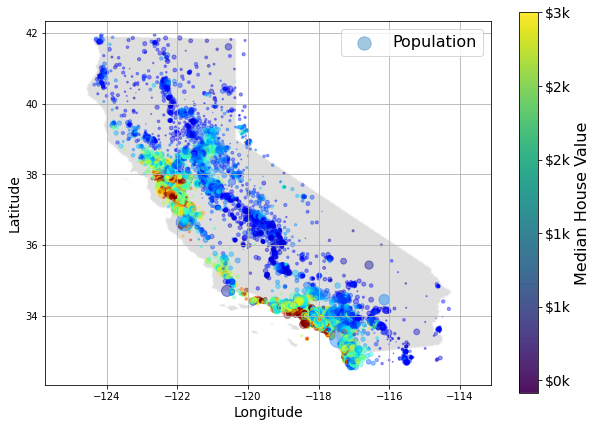

In [ ]:
minLat = min(df['Latitude'])
maxLat = max(df['Latitude'])
minLong = min(df['Longitude'])
maxLong = max(df['Longitude'])
population = df['Population']

california_img = mpimg.imread("california.png")
ax = df.plot(kind="scatter", x='Longitude', y='Latitude', figsize=(10,7), s=population/100, label="Population",c=houses['target'], cmap=plt.get_cmap("jet"), alpha=0.4,colorbar = False, grid=True)

plt.imshow(california_img, extent=[minLong - 1.4, maxLong + 1.2, minLat - 0.5, maxLat + 0.4], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = houses["target"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")
cbar.ax.set_yticklabels(["$%dk"%(round(v)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

# looking at the scatter plot, we can see that the housings are more expensive
# on the cost of the land. Housings are more dense in the middle of the land and
# least dense on the east side.

**c)** Calculate descriptive statistics on the independent variables. You may want to create a dataframe. 

In [ ]:
dataframe = df.drop(['classifier'], axis=1) # Dependent variable (classifier) removed
dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


**d)** Identify potential outliers and substantiate using Boxplots. Discuss what approach you want to take for handling
   outliers and implement this approach.

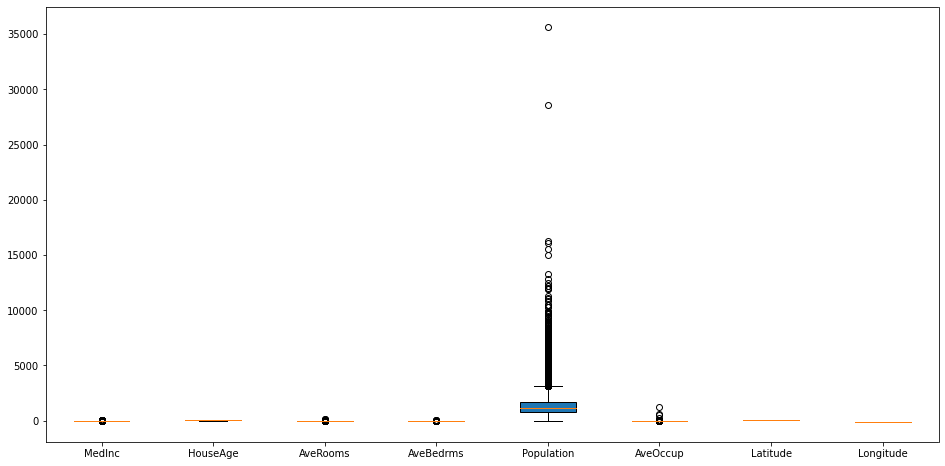

In [ ]:
plt.figure(figsize=(16,8))
plt.boxplot(dataframe.values, patch_artist=True, labels=columns)
plt.show()

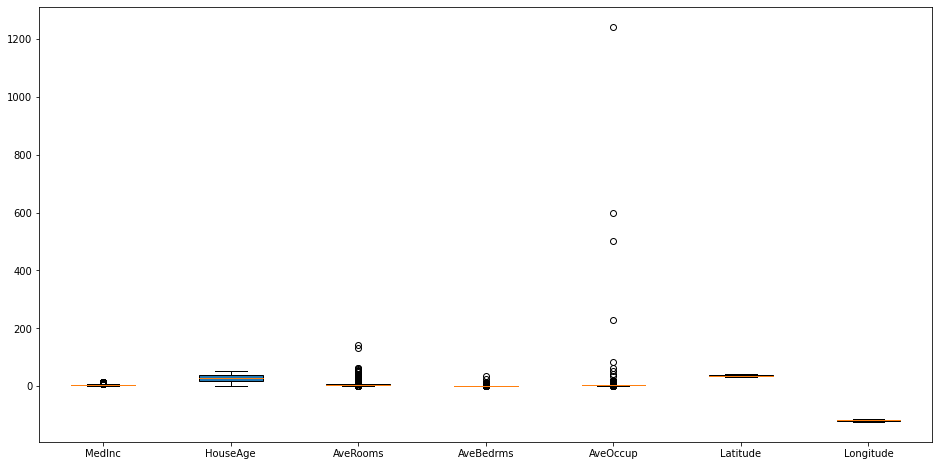

In [ ]:
# Since the column "population" appears to be out of the scale compared to the
# other variables, we decided to drop the column and plot again the data to
# see how the other attributes compare to each other.
newDataframe = dataframe.drop(['Population'], axis=1)
newColumns = columns.copy()
newColumns.remove('Population')
plt.figure(figsize=(16,8))
boxplt = plt.boxplot(newDataframe.values, patch_artist=True, labels=newColumns)
plt.show()

MedInc
total number of outliers 0
HouseAge
total number of outliers 0
AveRooms
total number of outliers 133
AveBedrms
total number of outliers 145
Population
total number of outliers 342
AveOccup
total number of outliers 8
Latitude
total number of outliers 0
Longitude
total number of outliers 0


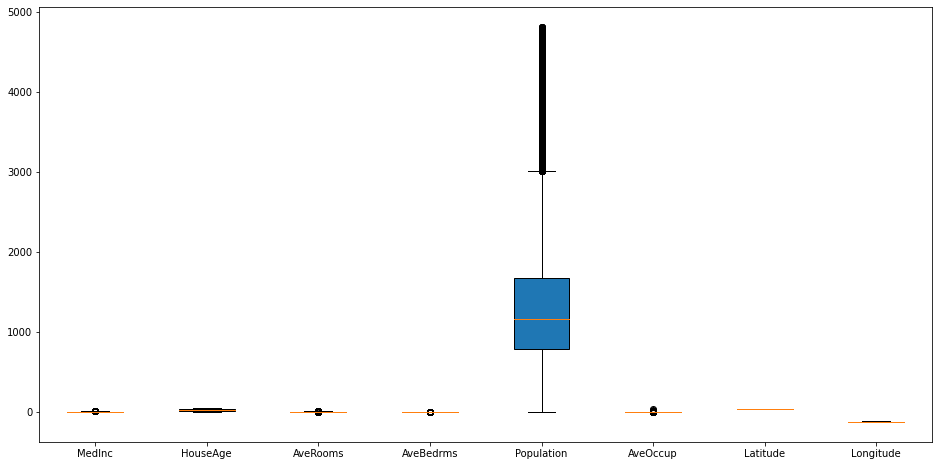

In [ ]:
# Handling Outliers
# Any attribute value with z-score greater than 3 or less than -3 is 
# considered to be an outlier.
# We decided to replace the outliers with the mean of the attribute.

z = np.abs(stats.zscore(dataframe))
threshold = 3

# Add Population column back into the dataframe
mean = []
i = 0
for col in dataframe:
  print(col)
  totalOutliers = 0
  rows = dataframe[col]
  mean = rows.mean()

  if(col == 'AveRooms' or col == 'AveBedrms' or col == 'AveOccup' or col == 'Population'):
    col_z_scores = np.abs(stats.zscore(dataframe[col]))
    # print(col_z_scores)
    j = 0
    for score in col_z_scores:
      if score > 3 :
        totalOutliers= totalOutliers + 1
        # print(score)
        # print("Actual ",dataframe[col][j])
        dataframe.loc[j, col] = mean
        # print("new", dataframe[col][j])
      j = j+1
  print("total number of outliers", totalOutliers)
  i = i+1


# print(dataframe.describe())
plt.figure(figsize=(16,8))
boxplt = plt.boxplot(dataframe.values, patch_artist=True, labels=columns)
plt.show()

since the population is on a scale much bigger than the rest of the attributes, it is difficult to see the others.

**e)** Create a correlation matrix - include scatterplots of all pairs of the variables.

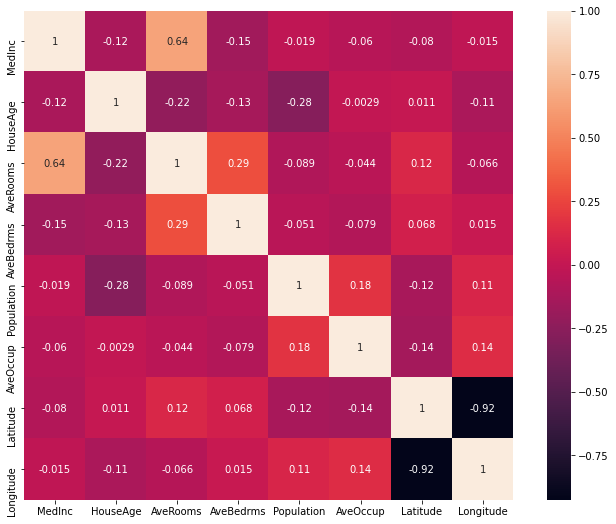

In [ ]:
corrmat = dataframe.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True)

- There is a strong positive correlation between Average Rooms (AveRooms) and 
Median Income (MedInc).
- A weak positive correlation between Average Bedrooms (AveBedrms) and Average Rooms (AveRooms).
- The House Age (HouseAge) has week correlation with average rooms and popluation.

we can see this further in the scatter pairplot below.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


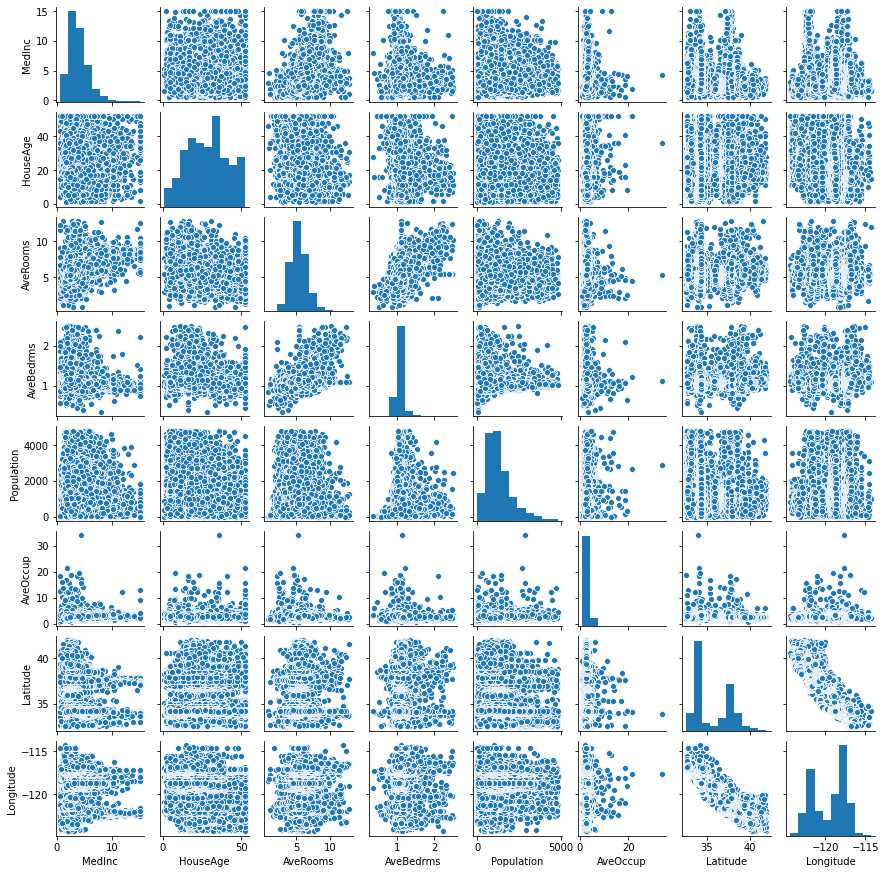

In [ ]:
sns.pairplot(dataframe, size = 1.5)
plt.show()

The correlation of AveRooms-MedInc and AveBedrms-AveRooms are identifiable on the scatter graphs. But we can't say the same for the correlations related to the house age. Since it has week correlations, they are not easy to identify.


**f)** Create a training set and a test set.

---



In [ ]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(dataframe, df['classifier'], test_size=0.2)

In [ ]:
X_train_0.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
X_train_0.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14461,3.7596,21.0,4.112228,1.105528,1015.0,1.700168,32.84,-117.28
7620,3.8125,19.0,4.755495,1.153846,1032.0,2.835165,33.84,-118.25
7025,3.3942,36.0,3.811966,0.923077,410.0,3.504274,33.98,-118.11
9536,2.8519,17.0,5.047809,1.029880,1764.0,3.513944,37.43,-120.79
1303,2.0411,24.0,4.186347,1.077491,1239.0,2.285978,38.00,-121.85


In [ ]:
y_train_0.head()

14461    0
7620     0
7025     1
9536     1
1303     1
Name: classifier, dtype: int64

**g)** Get the data ready for training by performing relevant scaling

In [ ]:
# Use MinMaxScaler/StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train_0)

X_train_scaled = scaler.transform(X_train_0)
X_test_scaled = scaler.transform(X_test_0)

In [ ]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

print(dataframe.shape)
print(df['classifier'].shape)

(16512, 8)
(4128, 8)
(20640, 8)
(20640,)


# Exercise 2: Decision Trees

**a)** Using the training data, divide this into a training and validation set using the same ratio as in (1f).

In [ ]:
# Create validation sets
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train_scaled, y_train_0, test_size=0.2, random_state=1)

**b)** Learn a decision tree using the training data and evaluate its performance on both the training data
   and the validation data. Use the default values of the hyperparameters. Comment on the accuracy of both.
   What does this tell you about overfitting?

In [ ]:
# Decision Trees Initialization
classifier = DecisionTreeClassifier()

# Fit decision tree models
classifier.fit(X_train_scaled, y_train_0)

print("Training set accuracy: {}".format(classifier.score(X_train_scaled, y_train_0)))
print("Testing set accuracy: {}".format(classifier.score(X_test_scaled, y_test_0)))

classifier.fit(X_train_val, y_train_val)

print("Validation training set accuracy: {}".format(classifier.score(X_train_val, y_train_val)))
print("Validation test set accuracy: {}".format(classifier.score(X_test_val, y_test_val)))

Training set accuracy: 1.0
Testing set accuracy: 0.8306686046511628
Validation training set accuracy: 1.0
Validation test set accuracy: 0.836209506509234


The algorithm's scores on both the training and validation training sets is 1, this means that the model trained "too well", hence it will not generalize well. it will fail to fit additional data or predict future observations reliably.

**c)** Generate random training/test partitions of varying sizes and analyze how the accuracy results vary (consult the
   documentation for train_test_split(.)).

In [ ]:
test_sizes = np.random.randint(low=10, high=80, size=10)
for size in test_sizes:
  print("--------------------------------------------------------------------------------")
  print("                          test size = ", size)
  print("--------------------------------------------------------------------------------")
  X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_0, test_size=size/100, shuffle=True, random_state=1)
  tree_classifier = DecisionTreeClassifier()
  tree_classifier.fit(X_train,y_train)
  print("Accuracy training set: {}".format(tree_classifier.score(X_train,y_train)))
  print("Accuracy test set: {}".format(tree_classifier.score(X_test,y_test)))
  print("\n")

--------------------------------------------------------------------------------
                          test size =  72
--------------------------------------------------------------------------------
Accuracy training set: 1.0
Accuracy test set: 0.8022541845403314


--------------------------------------------------------------------------------
                          test size =  38
--------------------------------------------------------------------------------
Accuracy training set: 1.0
Accuracy test set: 0.8256573705179283


--------------------------------------------------------------------------------
                          test size =  20
--------------------------------------------------------------------------------
Accuracy training set: 1.0
Accuracy test set: 0.8398425673630033


--------------------------------------------------------------------------------
                          test size =  35
----------------------------------------------------------------

The score on training data sets stays the same that is equal to 1, regardless of the size. On the other hand, when the test data size increases, the scores on the testing sets decrease and vice versa.

**d)** Display the decision tree learned using the training data.

In [ ]:
dot_data = export_graphviz(tree_classifier, out_file=None,
                           class_names=["cirle","triangle"],
                           feature_names=columns, 
                           filled=True)

graph = graphviz.Source(dot_data)
graph

Output hidden; open in https://colab.research.google.com to view.

**e)** What are the most important features as determined by the learned tree and how do the features
   deemed *most important* by the decision tree learner match the generated tree and your understanding of the domain?

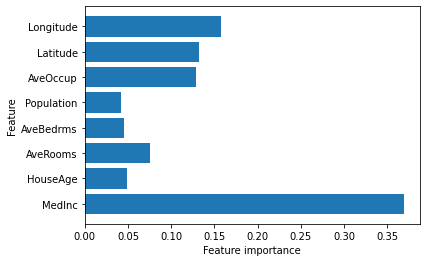

In [ ]:
def plot_feature_importances(model, n_features, feature_names):
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(tree_classifier, dataframe.shape[1], columns)

The most important features are MedInc followed by Longitude, Latitude and AveOccup. The rest of the features are seemed to be less important. The decision tree classifier uses the Gini impurity and the probability of reaching a node.

**f)** Try to manually control the complexity of the learned decision tree by adjusting the parameters max_depth,
   min_samples_split, min_samples_leaf, and investigate the effect when changing these parameters by:
   - Visualizing (some of) the trees
   - Evaluating the performance of the models on both the training data and the test data.

Accuracy on training set: 0.786
Accuracy on test set: 0.781


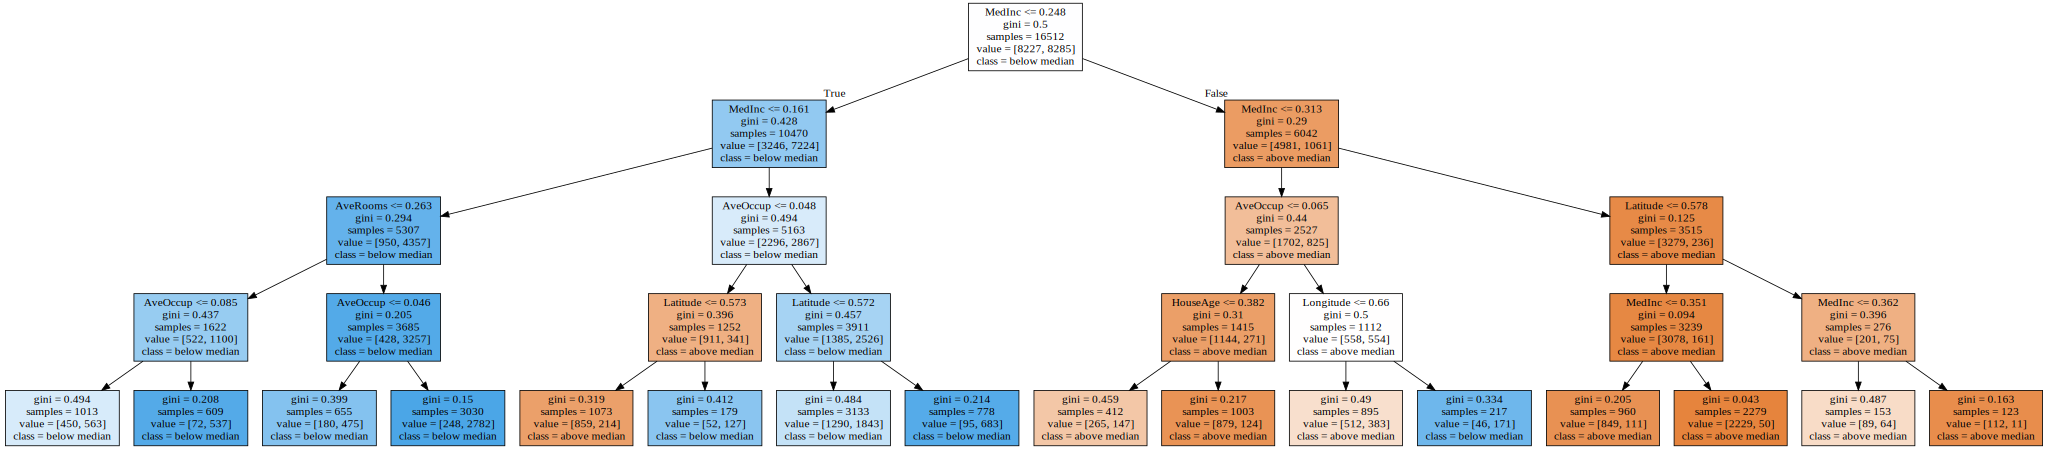

In [ ]:
# The paper, An empirical study on hyperparameter tuning of decision trees (https://arxiv.org/abs/1812.02207) 
# states that the ideal min_samples_leaf values tend to be between 1 to 20 and
# the ideal min_samples_split values tend to be between 1 to 40 for the CART 
# algorithm which is the algorithm implemented in scikit-learn. 
# we use max_depth = 4 as a starting point and min_samples_split=2, min_samples_leaf=1
tree_classifier = DecisionTreeClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, random_state=0)
tree_classifier.fit(X_train_scaled, y_train_0)

print("Accuracy on training set: {:.3f}".format(tree_classifier.score(X_train_scaled, y_train_0)))
print("Accuracy on test set: {:.3f}".format(tree_classifier.score(X_test_scaled, y_test_0)))

dot_data = export_graphviz(tree_classifier, out_file=None,
                           class_names=["above median","below median"],
                           feature_names=columns, 
                           filled=True)

graph = graphviz.Source(dot_data)
graph

In [ ]:
tree_classifier = DecisionTreeClassifier(max_depth=15, min_samples_split=10, min_samples_leaf=5, random_state=0)
tree_classifier.fit(X_train_scaled, y_train_0)

print("Accuracy on training set: {:.3f}".format(tree_classifier.score(X_train_scaled, y_train_0)))
print("Accuracy on test set: {:.3f}".format(tree_classifier.score(X_test_scaled, y_test_0)))

dot_data = export_graphviz(tree_classifier, out_file=None,
                           class_names=["above median","below median"],
                           feature_names=columns, 
                           filled=True)

graph = graphviz.Source(dot_data)
graph

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# when max_depth is 4
# Accuracy on training set: 0.790
# Accuracy on test set: 0.781
tree_classifier = DecisionTreeClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, random_state=0)
tree_classifier.fit(X_train_scaled, y_train_0)
print("--------------------------------------------------------------------------------")
print("                          max_depth = 4")
print("--------------------------------------------------------------------------------")
print("Accuracy on training set: {:.3f}".format(tree_classifier.score(X_train_scaled, y_train_0)))
print("Accuracy on test set: {:.3f}".format(tree_classifier.score(X_test_scaled, y_test_0)))



# when max_depth is 3
# Accuracy on training set: 0.777
# Accuracy on test set: 0.766
tree_classifier = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=0)
tree_classifier.fit(X_train_scaled, y_train_0)
print("--------------------------------------------------------------------------------")
print("                          max_depth = 3")
print("--------------------------------------------------------------------------------")
print("Accuracy on training set: {:.3f}".format(tree_classifier.score(X_train_scaled, y_train_0)))
print("Accuracy on test set: {:.3f}".format(tree_classifier.score(X_test_scaled, y_test_0)))



# when max_depth is 10
# Accuracy on training set: 0.913
# Accuracy on test set: 0.854
tree_classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=0)
tree_classifier.fit(X_train_scaled, y_train_0)
print("--------------------------------------------------------------------------------")
print("                          max_depth = 10")
print("--------------------------------------------------------------------------------")
print("Accuracy on training set: {:.3f}".format(tree_classifier.score(X_train_scaled, y_train_0)))
print("Accuracy on test set: {:.3f}".format(tree_classifier.score(X_test_scaled, y_test_0)))



# when max_depth is 15
# min_samples_split=5, min_samples_leaf=1
# Accuracy on training set: 0.970
# Accuracy on test set: 0.853



# after trying various different values for max_depth, we found out that values
# above 15 would make the model overfit, so stayed below 15 for max_depth.
# but then there is a bigger difference between the score for testing and 
# training sets. the difference was lower when the value for max_depth was
# closer to 6.
# On the other hand, increasing the values for min_samples_split and 
# min_samples_leaf would make the model underfit to find a good ground, we chose
# min_samples_split=5 and min_samples_leaf=1

--------------------------------------------------------------------------------
                          max_depth = 4
--------------------------------------------------------------------------------
Accuracy on training set: 0.786
Accuracy on test set: 0.781
--------------------------------------------------------------------------------
                          max_depth = 3
--------------------------------------------------------------------------------
Accuracy on training set: 0.774
Accuracy on test set: 0.773
--------------------------------------------------------------------------------
                          max_depth = 10
--------------------------------------------------------------------------------
Accuracy on training set: 0.914
Accuracy on test set: 0.849


**g)** Using the training/validation set, use (for) loops to find the best values of at least two hyperparameters.

In [ ]:
for i in range(1,20):
  tree = DecisionTreeClassifier(max_depth=i, min_samples_split=i+1, min_samples_leaf=i, random_state=0)

  tree.fit(X_train_scaled, y_train_0)

  print("Accuracy on training set: {:.3f}".format(tree.score(X_train_scaled, y_train_0)))
  print("Accuracy on test set: {:.3f}".format(tree.score(X_test_scaled, y_test_0)))
  print("Parameters value: {}".format(i))


print("---------------------------------")


for i in range(1,20):
  tree = DecisionTreeClassifier(max_depth=i, min_samples_split=i+1, min_samples_leaf=i, random_state=0)

  tree.fit(X_train_val, y_train_val)

  print("Accuracy on training set: {:.3f}".format(tree.score(X_train_val, y_train_val)))
  print("Accuracy on test set: {:.3f}".format(tree.score(X_test_val, y_test_val)))
  print("Parameters' value: {}".format(i))

Accuracy on training set: 0.739
Accuracy on test set: 0.742
Parameters value: 1
Accuracy on training set: 0.739
Accuracy on test set: 0.742
Parameters value: 2
Accuracy on training set: 0.774
Accuracy on test set: 0.773
Parameters value: 3
Accuracy on training set: 0.786
Accuracy on test set: 0.781
Parameters value: 4
Accuracy on training set: 0.814
Accuracy on test set: 0.801
Parameters value: 5
Accuracy on training set: 0.828
Accuracy on test set: 0.813
Parameters value: 6
Accuracy on training set: 0.850
Accuracy on test set: 0.829
Parameters value: 7
Accuracy on training set: 0.875
Accuracy on test set: 0.851
Parameters value: 8
Accuracy on training set: 0.884
Accuracy on test set: 0.851
Parameters value: 9
Accuracy on training set: 0.894
Accuracy on test set: 0.853
Parameters value: 10
Accuracy on training set: 0.897
Accuracy on test set: 0.858
Parameters value: 11
Accuracy on training set: 0.902
Accuracy on test set: 0.856
Parameters value: 12
Accuracy on training set: 0.902
Accur

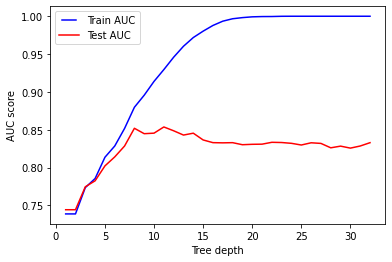

In [ ]:

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train_scaled, y_train_0)
   train_pred = dt.predict(X_train_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_0, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_0, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
# looking at the graph above the best value for one of the hyperparameters,
# max_depth, is 6. That's when they start to diverge

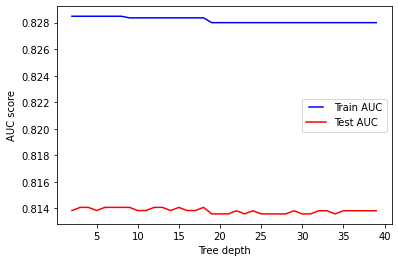

In [ ]:
# finding min sample split
splits = np.array(range(2,40))
train_results = []
test_results = []
for split in splits:
   dt = DecisionTreeClassifier(max_depth=6, min_samples_split=split)
   dt.fit(X_train_scaled, y_train_0)
   train_pred = dt.predict(X_train_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_0, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_0, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
line1, = plt.plot(splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

trying out different values for the min sample split. It didn't improve much

**h)** Using cross validation, use (for) loops to find the best values of at least two hyperparameters.

In [ ]:
print("--------------------------------------------------------------------------------")
print("                          max_depth parameter")
print("--------------------------------------------------------------------------------")

for i in range(2,10):
    kf = KFold(n_splits=10)
    tree_classifier = DecisionTreeClassifier(max_depth=i)
    print("Partition {}: {} for max_depth = {}".format(i,cross_val_score(tree_classifier,X_train_scaled,y_train_0,cv=kf), i))
    print("------------------------------------------------")

print("--------------------------------------------------------------------------------")
print("                         min_samples_split parameter")
print("--------------------------------------------------------------------------------")

for i in range(2,10):
    kf = KFold(n_splits=10)
    tree_classifier = DecisionTreeClassifier(min_samples_leaf=i)
    print("Partition {}: {} for min_samples = {}".format(i,cross_val_score(tree_classifier,X_train_scaled,y_train_0,cv=kf), i))
    print("------------------------------------------------------------------------------------")

--------------------------------------------------------------------------------
                          max_depth parameter
--------------------------------------------------------------------------------
Partition 2: [0.739104 0.739709 0.737735 0.745609 0.725621 0.762568 0.735918 0.743186
 0.721987 0.729861] for max_depth = 2
------------------------------------------------
Partition 3: [0.776029 0.773608 0.778922 0.767414 0.771048 0.765597 0.769231 0.769836
 0.750454 0.761357] for max_depth = 3
------------------------------------------------
Partition 4: [0.784504 0.782082 0.795881 0.784979 0.78195  0.797093 0.774076 0.788007
 0.758934 0.772259] for max_depth = 4
------------------------------------------------
Partition 5: [0.803269 0.792978 0.814658 0.796487 0.78619  0.814658 0.798304 0.786796
 0.789824 0.773471] for max_depth = 5
------------------------------------------------
Partition 6: [0.824455 0.806295 0.819503 0.804361 0.812235 0.817081 0.814658 0.806178
 0.804967 0.82

**i)** Use an automated process for finding the optimal hyperparameters. (Ask if you are unsure as to what "automated" means in this context).

In [ ]:


parameters = {'max_depth':[1,10], 'min_samples_split':[2, 10], 'min_samples_leaf':[1,10]}

clf = GridSearchCV(tree_classifier, parameters)

print(clf.fit(X_train_scaled, y_train_0)) # Display best parameters given by GridSearchCV

print("Accuracy on training set: {:.3f}".format(clf.score(X_train_scaled, y_train_0)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test_scaled, y_test_0)))

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=9,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 10], 'min_samples_leaf': [1, 10],

**j)** Using the "best" of all the above DT models, build a classifier which will be used later.

In [ ]:
DT_best = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=9, random_state=0)

# Exercise 3: K-Nearest Neighbor

**a)** Use the data training/validation set obtained in (2a).

In [ ]:
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train_scaled, y_train_0, test_size=0.2, random_state=1)
print("Number of data points in training set and test set, respectively: {} and {}".format(X_train_val.shape[0], 
                                                                                          X_test_val.shape[0]))

Number of data points in training set and test set, respectively: 13209 and 3303


**b)** Classify the instances in the validation set using default settings for the k-NN classifier.

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train_val, y_train_val)
print(*clf.predict(X_test_val))
print("Accuracy of the train set score: {} ".format(clf.score(X_train_val, y_train_val)))
print("Accuracy of the test set score: {} ".format(clf.score(X_test_val, y_test_val)))

0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 

**c)** Try experimenting with different values for 'k'. How do the values affect the classification results?
    Feel free to automate this process using the methods explored in the previous exercise.

In [ ]:
for i in range(1,11):
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train_val, y_train_val)
  clf.fit(X_test_val, y_test_val)
  print("-----------------------------------------------------")
  print("For K = {} -> test set predictions: {}".format(i, clf.predict(X_test_val)))
  print("For K = {} -> the train set score: {} ".format(i, clf.score(X_train_val, y_train_val)))
  print("For K = {} -> the test set score: {} ".format(i, clf.score(X_test_val, y_test_val)))

-----------------------------------------------------
For K = 1 -> test set predictions: [0 1 0 ... 0 1 1]
For K = 1 -> the train set score: 0.7877961995609054 
For K = 1 -> the test set score: 1.0 
-----------------------------------------------------
For K = 2 -> test set predictions: [0 1 0 ... 0 0 1]
For K = 2 -> the train set score: 0.7775001892648952 
For K = 2 -> the test set score: 0.8976687859521647 
-----------------------------------------------------
For K = 3 -> test set predictions: [0 1 0 ... 0 0 1]
For K = 3 -> the train set score: 0.8111893406011053 
For K = 3 -> the test set score: 0.906751438086588 
-----------------------------------------------------
For K = 4 -> test set predictions: [0 1 0 ... 0 0 1]
For K = 4 -> the train set score: 0.803921568627451 
For K = 4 -> the test set score: 0.8813200121102028 
-----------------------------------------------------
For K = 5 -> test set predictions: [1 1 0 ... 0 0 1]
For K = 5 -> the train set score: 0.8183814066167008 


Text(0, 0.5, 'Testing Accuracy')

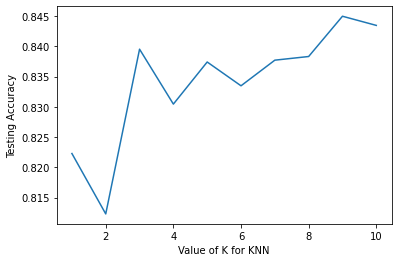

In [ ]:

k_range_i = range(1,11)
scores_i = []
for i in k_range_i:
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train_val, y_train_val)
  y_pred_val = clf.predict(X_test_val)
  scores_i.append(metrics.accuracy_score(y_test_val, y_pred_val))
plt.plot(k_range_i, scores_i)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

**d)** Based on your understanding of the data and the properties of the k-NN classifier, does it seem reasonable to
   try to manipulate the data (e.g. through normalization) or work with different distance metrics in order to
   improve the performance of the classifier? How does such changes affect classification accuracy?

Accuracy on training set: 0.421
Accuracy on test set: 0.413


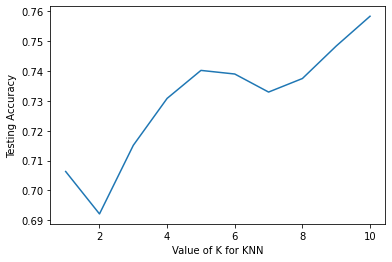

In [ ]:
# Normalization performance impact

X_train_n = ((X_train_val-X_train_val.mean(axis=0))/X_train_val.std(axis=0)).astype('int')
X_test_n = ((X_test_val-X_test_val.mean(axis=0))/X_test_val.std(axis=0)).astype('int')
y_train_n = ((y_train_val-y_train_val.mean(axis=0))/y_train_val.std(axis=0)).astype('int')
y_test_n = ((y_test_val-y_test_val.mean(axis=0))/y_test_val.std(axis=0)).astype('int')

k_range = range(1,11)
scores = []

for i in k_range:
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train_n, y_train_n)
  y_pred_n = clf.predict(X_test_n)
  scores.append(metrics.accuracy_score(y_test_n, y_pred_n))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Normalizing the data decreases the performance of the model.

# Learning the model using p=1 -> manhattan distance decreases the performance
knn = KNeighborsClassifier(p=1)
print("Accuracy on training set: {:.3f}".format(clf.score(X_train_val, y_train_val)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test_val, y_test_val)))

In [ ]:
# we use the gridSearchCV to find the best parameters with highest scores.
# GridSearchCV
knn = KNeighborsClassifier()

parameters = {'n_neighbors':[1,15], 'weights':['uniform', 'distance'], 'p':[1,3]} # p=1 -> manhattan, p=2 -> minkowski
clf = GridSearchCV(knn, parameters)

print(clf.fit(X_train_val, y_train_val)) # Display best parameters given by GridSearchCV
print("Accuracy on training set: {:.3f}".format(clf.score(X_train_scaled, y_train_0)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test_scaled, y_test_0)))

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 15], 'p': [1, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
Accuracy on training set: 0.971
Accuracy on test set: 0.863


**e)** Using the "best" of all the above KNN models, build a classifier which will be used later.

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=5)

# Exercise 4: Naive Bayes

**a)** Use the training/validation set obtained in (2a).

In [ ]:
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train_scaled, y_train_0, test_size=0.2, random_state=1)

**b)** Classify the instances in the test set using the naive Bayes model.

In [ ]:

# Models definition

nb_val = GaussianNB()
nb = GaussianNB()

In [ ]:
# Training data

nb.fit(X_train_scaled, y_train_0)

print("Accuracy score on the train set: {}".format(nb.score(X_train_scaled, y_train_0)))
print("Accuracy score on the test set: {}".format(nb.score(X_test_scaled, y_test_0)))

y_pred = nb.fit(X_train_scaled, y_train_0).predict(X_test_scaled)

print("Number of mislabeled points out of a total %d points : %d"% (X_test_scaled.shape[0], (y_test_0 != y_pred).sum()))

Accuracy score on the train set: 0.7609011627906976
Accuracy score on the test set: 0.7647771317829457
Number of mislabeled points out of a total 4128 points : 971


In [ ]:
# Validation data

nb_val.fit(X_train_val, y_train_val)

print("Accuracy score on the train validation set: {}".format(nb_val.score(X_train_val, y_train_val)))
print("Accuracy score on the test validation set: {}".format(nb_val.score(X_test_val, y_test_val)))

y_pred = nb_val.fit(X_train_val, y_train_val).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

Accuracy score on the train validation set: 0.7574381103792869
Accuracy score on the test validation set: 0.7726309415682713
Number of mislabeled points out of a total 3633 points : 828


**c)** The naive Bayes classifier makes the strong assumption that the attributes are conditionally independent given
   the class variable. Can you identify any pairs of attributes that do not adhere to this assumption,
   and how does it affect the performance of the classifier if one of the attributes are removed?

In [ ]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train_0)
columns = np.array(dataframe.columns)

index = 0;

for features in columns:
  print("----------------------------------------------------------------------------------------------------------------")
  print("The conditional variance learned by the model for the {} features: {}".format(features, nb.sigma_[:,index]))
  print("The conditional means learned by the model for the {} features: {}".format(features, nb.theta_[:,index]))
  print("----------------------------------------------------------------------------------------------------------------")
  print("\n")
  index += 1

----------------------------------------------------------------------------------------------------------------
The conditional variance learned by the model for the MedInc features: [0.01986  0.005248]
The conditional means learned by the model for the MedInc features: [0.301231 0.164672]
----------------------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------------------
The conditional variance learned by the model for the HouseAge features: [0.062645 0.058396]
The conditional means learned by the model for the HouseAge features: [0.55785  0.522605]
----------------------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------------------
The conditional variance learned by the model for the AveRooms featur

In [ ]:
X_train_scaled_copy = X_train_scaled.copy()
X_test_scaled_copy = X_test_scaled.copy()

for index in range(0,8):
  X_train_copy = np.delete(X_train_scaled_copy,index,1)
  X_test_copy = np.delete(X_test_scaled_copy,index,1)
  nb.fit(X_train_copy, y_train_0)
  print("----------------------------------------------------------------------------------------------------------------")
  print("Accuracy score on the train set: {} for column removed: {}".format(nb.score(X_train_copy, y_train_0), columns[index]))
  print("Accuracy score on the test set: {} for column removed: {}".format(nb.score(X_test_copy, y_test_0), columns[index]))
  print("----------------------------------------------------------------------------------------------------------------\n")

----------------------------------------------------------------------------------------------------------------
Accuracy score on the train set: 0.6896802325581395 for column removed: MedInc
Accuracy score on the test set: 0.6996124031007752 for column removed: MedInc
----------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------
Accuracy score on the train set: 0.7532097868217055 for column removed: HouseAge
Accuracy score on the test set: 0.7567829457364341 for column removed: HouseAge
----------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------
Accuracy score on the train set: 0.7782218992248062 for column removed: AveRooms
Accuracy score on the test set: 0.

**d)** Using the "best" of all the above NB models, build a classifier which will be used later.

In [ ]:
NB_best = GaussianNB()

# Exercise 5: Model Comparison

**a)** Using the train/test set obtained in (1f/1g), train classifiers based on the classifiers obtained in (2j), (3e), and (4d)

In [ ]:
DT_best.fit(X_train_scaled, y_train_0)
knn_best.fit(X_train_scaled, y_train_0)
NB_best.fit(X_train_scaled, y_train_0) # forgot to take out the AvgRoom feature

GaussianNB(priors=None, var_smoothing=1e-09)

**b)** Evaluate performance of this classifier by discussing their confusion matrices, accuracy, precision, recall, f-score,
   precision-recall curves, ROC-curves, and AUC

In [ ]:
print("Decision Tree Classfier")
print("Accuracy on training set: {:.3f}".format(DT_best.score(X_train_scaled, y_train_0)))
print("Accuracy on test set: {:.3f}".format(DT_best.score(X_test_scaled, y_test_0)))
print("----------------------------------------------------------------------------------------------------------------")
print("\n")

print("K-Nearest Neighbor Classfier")
print("Accuracy on training set: {:.3f}".format(knn_best.score(X_train_scaled, y_train_0)))
print("Accuracy on test set: {:.3f}".format(knn_best.score(X_test_scaled, y_test_0)))
print("----------------------------------------------------------------------------------------------------------------")
print("\n")

print("Naive Bayes Classfier")
print("Accuracy on training set: {:.3f}".format(NB_best.score(X_train_scaled, y_train_0)))
print("Accuracy on test set: {:.3f}".format(NB_best.score(X_test_scaled, y_test_0)))

Decision Tree Classfier
Accuracy on training set: 0.917
Accuracy on test set: 0.849
----------------------------------------------------------------------------------------------------------------


K-Nearest Neighbor Classfier
Accuracy on training set: 0.893
Accuracy on test set: 0.847
----------------------------------------------------------------------------------------------------------------


Naive Bayes Classfier
Accuracy on training set: 0.761
Accuracy on test set: 0.765


In [ ]:

print("Decision Tree Classfier")
pred_DT = DT_best.predict(X_test_scaled)
print(confusion_matrix(y_test_0, pred_DT))

print("K-Nearest Neighbor Classfier")
pred_KNN = knn_best.predict(X_test_scaled)
print(confusion_matrix(y_test_0, pred_KNN))

print("Naive Bayes Classfier")
pred_NB = NB_best.predict(X_test_scaled)
print(confusion_matrix(y_test_0, pred_NB))

Decision Tree Classfier
[[1793  305]
 [ 320 1710]]
K-Nearest Neighbor Classfier
[[1781  317]
 [ 315 1715]]
Naive Bayes Classfier
[[1442  656]
 [ 315 1715]]


Decision Tree Classifier
[[1793  305]
 [ 320 1710]]


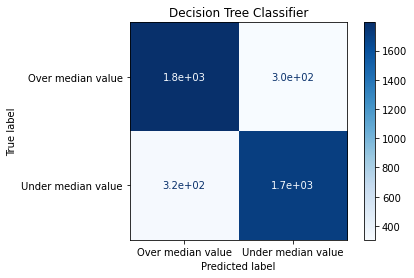

In [ ]:

class_names = ["Over median value", "Under median value"]
disp = plot_confusion_matrix(DT_best, X_test_scaled, y_test_0,
                              display_labels=class_names,
                              cmap=plt.cm.Blues,
                              normalize=None)
disp.ax_.set_title("Decision Tree Classifier")
print("Decision Tree Classifier")
print(disp.confusion_matrix)

plt.show()

In [ ]:
# Precision = TP/TP+FP
# Recall = TP/TP+FN
# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
# Support is the number of occurrences of each class in y_true

print("Decision Tree Classfier")

print(classification_report(y_test_0, pred_DT, target_names=class_names))

Decision Tree Classfier
                    precision    recall  f1-score   support

 Over median value       0.85      0.85      0.85      2098
Under median value       0.85      0.84      0.85      2030

          accuracy                           0.85      4128
         macro avg       0.85      0.85      0.85      4128
      weighted avg       0.85      0.85      0.85      4128



In [ ]:
print("K-Nearest Neighbor Classfier")
print(classification_report(y_test_0, pred_KNN, target_names=class_names))

K-Nearest Neighbor Classfier
                    precision    recall  f1-score   support

 Over median value       0.85      0.85      0.85      2098
Under median value       0.84      0.84      0.84      2030

          accuracy                           0.85      4128
         macro avg       0.85      0.85      0.85      4128
      weighted avg       0.85      0.85      0.85      4128



In [ ]:
print("Naive Bayes Classfier")
print(classification_report(y_test_0, pred_NB, target_names=class_names))

Naive Bayes Classfier
                    precision    recall  f1-score   support

 Over median value       0.82      0.69      0.75      2098
Under median value       0.72      0.84      0.78      2030

          accuracy                           0.76      4128
         macro avg       0.77      0.77      0.76      4128
      weighted avg       0.77      0.76      0.76      4128



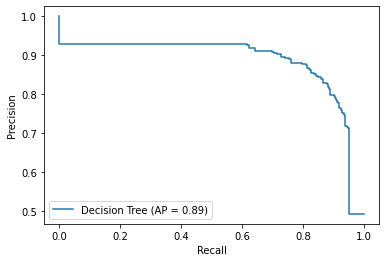

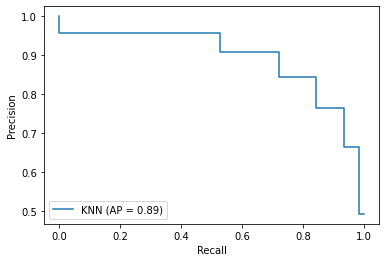

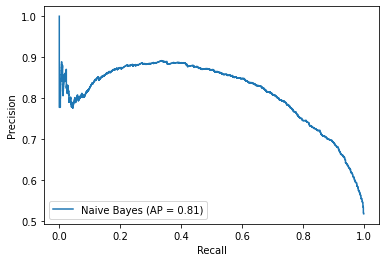

In [ ]:
disp = plot_precision_recall_curve(DT_best, X_test_scaled, y_test_0, name="Decision Tree")
disp = plot_precision_recall_curve(knn_best, X_test_scaled, y_test_0, name="KNN")
disp = plot_precision_recall_curve(NB_best, X_test_scaled, y_test_0, name="Naive Bayes")

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall). According to the graph the the decision tree classifier outperformes both knn and naive bayes

Decision Tree
0.9093461048993412
KNN
0.9211255617594989
NB
0.8528176025020311


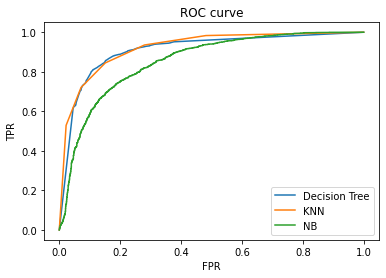

In [ ]:

def plotTheRoc(model, name):
  print(name)
  predictions = model.predict_proba(X_test_scaled)
  print(roc_auc_score(y_test_0, predictions[:,1]))
  fpr, tpr, _ = roc_curve(y_test_0, predictions[:,1])
  plt.plot(fpr, tpr, label=name)

plotTheRoc(DT_best, "Decision Tree")
plotTheRoc(knn_best, "KNN")
plotTheRoc(NB_best, "NB")


plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc=4)
plt.show()

For the ROC curve, the ideal curve is close to the top left. we want a classifier that produces a high recall while keeping a low false positive rate. that is Decision Tree classifier in our case.